### 2.1 Загрузка данных: Быстрый просмотр

In [28]:
import pandas as pd
df = pd.read_csv ('data_clean/cleaned_final_cars_data.csv')
df.head(2)

,model,year,price,total_km,hp,body,drive,fuel,location
0,Mitsubishi Lancer,2014,650000.0,100181.0,140.0,седан,передний,бензин,Москва
1,Mazda 3,2008,490000.0,213000.0,105.0,седан,передний,бензин,Свердловская область


In [29]:
df.dtypes

model        object
year          int64
price       float64
total_km    float64
hp          float64
body         object
drive        object
fuel         object
location     object
dtype: object

In [30]:
## Подробное описание стандартного отклонения 
## см. в нашем вспомогательном файле.

## В этом контексте стандартное отклонение 5,132224 означает, 
## что в среднем годы в вашем наборе данных отклоняются от среднего года примерно на 5,132224 года.
df.describe ()

,year,price,total_km,hp
count,5656.000000,5656.000000,5656.000000,5656.000000
mean,2012.216407,696539.233911,137306.148161,132.765205
std,5.132224,155618.216508,84263.716593,48.952725
min,1940.000000,450000.000000,1.000000,22.000000
25%,2009.000000,565000.000000,82000.000000,106.000000
50%,2012.000000,685000.000000,130506.000000,122.000000
75%,2016.000000,819000.000000,179000.000000,147.000000
max,2021.000000,1000000.000000,960000.000000,510.000000


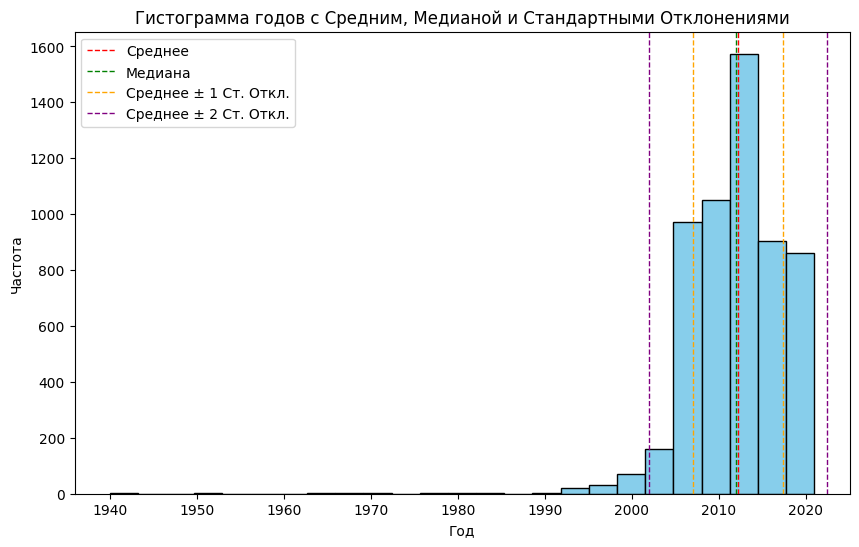

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Вычисляем статистику
mean_year = df['year'].mean()
median_year = df['year'].median()
std_year = df['year'].std()

# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(df['year'], bins=25, color='skyblue', edgecolor='black')

# Рисуем среднее, медиану, и ±1 и ±2 стандартных отклонения
plt.axvline(mean_year, color='red', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(median_year, color='green', linestyle='dashed', linewidth=1, label='Медиана')
plt.axvline(mean_year - std_year, color='orange', linestyle='dashed', linewidth=1, label='Среднее ± 1 Ст. Откл.')
plt.axvline(mean_year + std_year, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_year - 2*std_year, color='purple', linestyle='dashed', linewidth=1, label='Среднее ± 2 Ст. Откл.')
plt.axvline(mean_year + 2*std_year, color='purple', linestyle='dashed', linewidth=1)

# Добавляем легенду и метки
plt.legend()
plt.xlabel('Год')
plt.ylabel('Частота')
plt.title('Гистограмма годов с Средним, Медианой и Стандартными Отклонениями')

plt.show()

In [32]:
# pip install seaborn

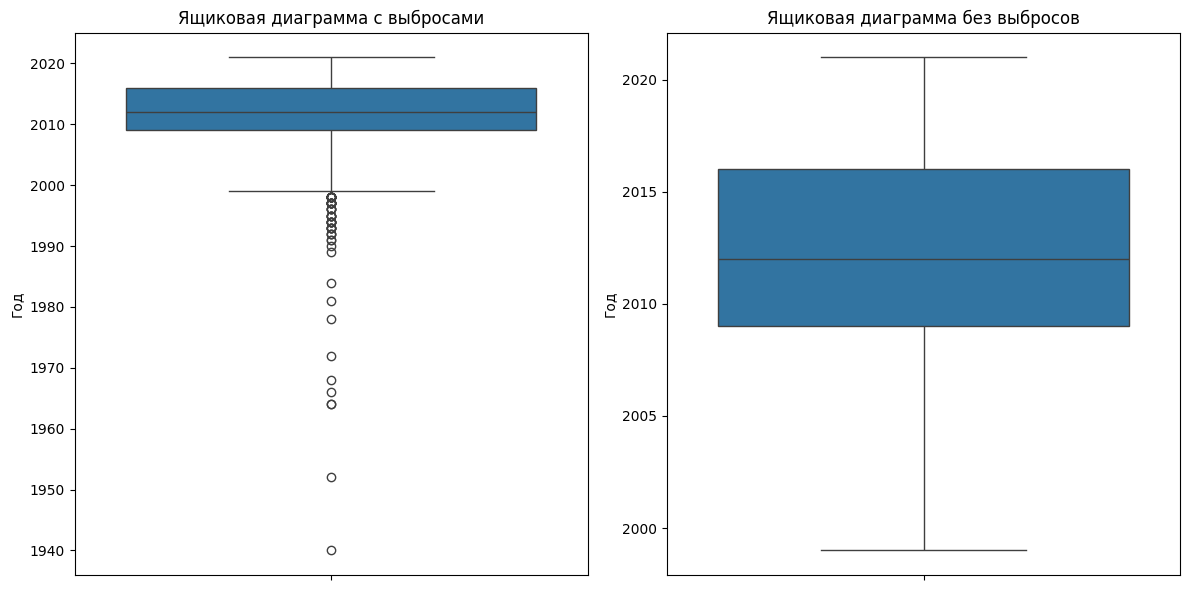

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot с выбросами
sns.boxplot(ax=axes[0], data=df, y='year')
axes[0].set_title('Ящиковая диаграмма с выбросами')
axes[0].set_ylabel('Год')

# Boxplot без выбросов
sns.boxplot(ax=axes[1], data=df, y='year', showfliers=False)
axes[1].set_title('Ящиковая диаграмма без выбросов')
axes[1].set_ylabel('Год')

plt.tight_layout()
plt.show()

##### Ящик (box): Представляет интерквартильный размах (IQR), который охватывает 50% наблюдений. Верхний и нижний края ящика обозначают первый (25-й процентиль) и третий (75-й процентиль) квартили соответственно. Линия внутри ящика - это медиана (50-й процентиль).

##### Усы (whiskers): Это линии, выходящие из ящика в обе стороны. Они обозначают диапазон значений, который находится в пределах 1.5 * IQR от первого и третьего квартилей. За пределами этого диапазона значения считаются выбросами и отображаются в виде отдельных точек или маркеров.

##### Выбросы (outliers): Это отдельные значения, находящиеся за пределами усов. Они могут представлять собой экстремальные значения или аномалии в данных.